In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
df = pd.read_csv("WeatherDataTest.csv")
# df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)

In [4]:
# df = df.iloc[331371:]
# df = df.drop(["time"], axis = 1)
# df = df.drop(["station_id"], axis = 1)
df = df.dropna()
df.shape

(34474, 11)

In [5]:
df.head()

,station_id,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,RelativeHumidity
0,M3,2010-06-10T14:00:00Z,1014.2,360.0,15.000,20.000,2.000,5.000,14.900,14.80,84.000
2,M6,2013-07-08T15:00:00Z,1033.1,190.0,8.000,12.000,1.200,6.000,13.600,14.20,95.000
4,M6,2017-07-07T17:00:00Z,1018.9,330.0,3.000,6.000,2.000,8.000,14.200,14.70,68.000
8,M5,2019-09-22T22:00:00Z,1005.2,265.0,15.369,19.734,1.719,5.391,15.635,15.82,78.906
11,M6,2012-02-16T07:00:00Z,1032.4,240.0,18.000,25.000,3.000,7.000,10.900,10.70,88.000


In [6]:
df = df.drop(["time"], axis = 1)
df = df.drop(["station_id"], axis = 1)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.isnull().sum()

AtmosphericPressure    0
WindDirection          0
WindSpeed              0
Gust                   0
WaveHeight             0
WavePeriod             0
AirTemperature         0
SeaTemperature         0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train.shape, X_test.shape

((27579, 8), (6895, 8))

# Forward Selection

In [10]:
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [11]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=8,
                          scoring='r2')

In [12]:
sfs.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'WaveHeight',
 'WavePeriod',
 'AirTemperature',
 'SeaTemperature')

# Backward selection

In [13]:
sfsb = SFS(LinearRegression(),
          k_features=8,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [14]:
sfsb.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=8, scoring='r2')

In [15]:
sfsb.k_feature_names_

('AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'WaveHeight',
 'WavePeriod',
 'AirTemperature',
 'SeaTemperature')

# Plot

In [16]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


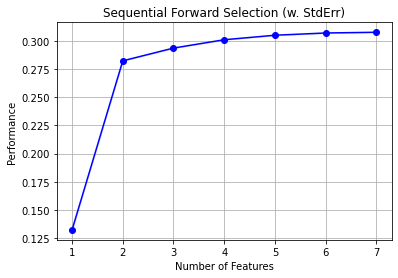

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [18]:
sfs2 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=False,
         floating=False,
         cv=0)
sfs2.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


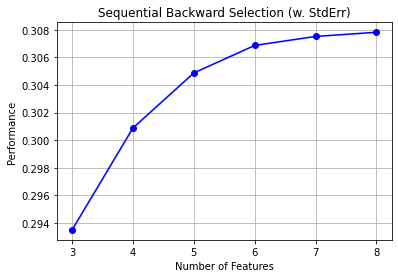

In [19]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [20]:
for cols in X_test.columns:
    X_test[cols] = pd.to_numeric(X_test[cols])

for cols in X_train.columns:
    X_train[cols] = pd.to_numeric(X_train[cols])

<ipython-input-20-a1e7eff26117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = pd.to_numeric(X_test[cols])
<ipython-input-20-a1e7eff26117>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pd.to_numeric(X_train[cols])


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 69874 to 5934
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AtmosphericPressure  27579 non-null  float64
 1   WindDirection        27579 non-null  float64
 2   WindSpeed            27579 non-null  float64
 3   Gust                 27579 non-null  float64
 4   WaveHeight           27579 non-null  float64
 5   WavePeriod           27579 non-null  float64
 6   AirTemperature       27579 non-null  float64
 7   SeaTemperature       27579 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


In [22]:
X_train.corr()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature
AtmosphericPressure,1.000000,-0.089213,-0.375882,-0.396475,-0.357750,-0.195546,0.043107,0.010544
WindDirection,-0.089213,1.000000,0.115920,0.129707,0.165509,0.115421,0.059315,0.104321
WindSpeed,-0.375882,0.115920,1.000000,0.962423,0.596290,0.229138,-0.107430,-0.113912
Gust,-0.396475,0.129707,0.962423,1.000000,0.685953,0.336726,-0.150474,-0.128344
WaveHeight,-0.357750,0.165509,0.596290,0.685953,1.000000,0.828473,-0.153461,-0.118605
WavePeriod,-0.195546,0.115421,0.229138,0.336726,0.828473,1.000000,-0.115536,-0.073571
AirTemperature,0.043107,0.059315,-0.107430,-0.150474,-0.153461,-0.115536,1.000000,0.857187
SeaTemperature,0.010544,0.104321,-0.113912,-0.128344,-0.118605,-0.073571,0.857187,1.000000


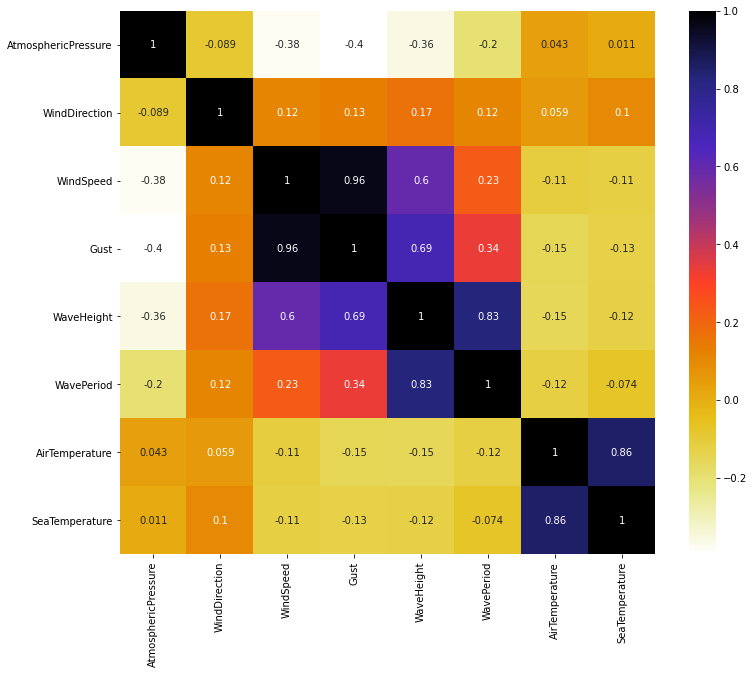

In [23]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.8)
# len(set(corr_features))

In [26]:
corr_features

{'Gust', 'SeaTemperature', 'WavePeriod'}

In [27]:
# X_train = X_train.drop(corr_features, axis = 1)
# X_test= X_test.drop(corr_features, axis = 1)
X = X.drop(corr_features, axis=1)

# Linear Regression

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
mse = cross_val_score(linear_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_nse = np.mean(mse)
print(mse)
linear_regressor.fit(X_train, y_train)

[-69.71094916 -68.95975775 -69.2228041  -71.86797407 -71.93259795]


LinearRegression()

In [29]:
prediction_linear = linear_regressor.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R2 score: ', r2_score(y_test, prediction_linear))
print('RMSE: ',  np.sqrt(mean_squared_error(y_test, prediction_linear)))
print('Mean absolute error: ', mean_absolute_error(y_test, prediction_linear))

R2 score:  0.29903178112023243
RMSE:  8.377219866157082
Mean absolute error:  6.803441083141764


# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-70.33881471539979


In [33]:
prediction_ridge = ridge_regressor.predict(X_test)

In [34]:
print('R2 score for ridge regression: ', r2_score(y_test, prediction_ridge))
print('RMSE for ridge regression: ',  np.sqrt(mean_squared_error(y_test, prediction_ridge)))
print('Mean absolute error for ridge regression: ', mean_absolute_error(y_test, prediction_ridge))

R2 score for ridge regression:  0.29903407292680684
RMSE for ridge regression:  8.377206171539594
Mean absolute error for ridge regression:  6.803491075363002


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-70.33881674978252


In [36]:
prediction_lasso = lasso_regressor.predict(X_test)

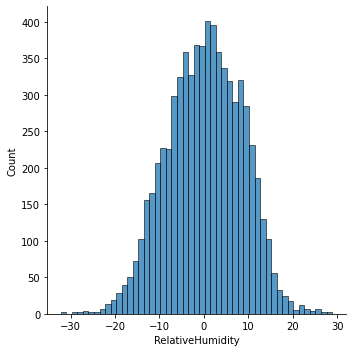

In [37]:
import seaborn as sns
sns.displot(y_test-prediction_lasso)

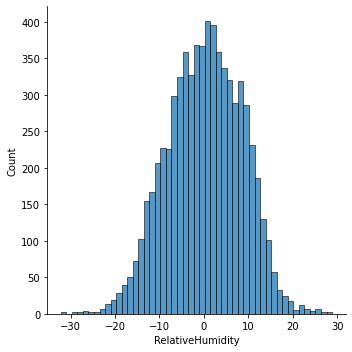

In [38]:
sns.displot(y_test-prediction_ridge)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score for lasso: ', r2_score(y_test, prediction_lasso))
print('RMSE for lasso: ',  np.sqrt(mean_squared_error(y_test, prediction_lasso)))
print('Mean_absolute_error: ', mean_absolute_error(y_test, prediction_lasso))

R2 score for lasso:  0.29903097336318796
RMSE for lasso:  8.377224692878343
Mean_absolute_error:  6.803455087934127


In [40]:
X.shape

(34474, 5)

In [41]:
for cols in X.columns:
    X[cols] = pd.to_numeric(X[cols])

# Cross Validation Plots

In [42]:
from sklearn.model_selection import KFold
mean_error=[]
std_error=[]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for c in C_range:
    model = Lasso(alpha = 1/(2*c))
    temp=[]
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        y_predict = model.predict(X.iloc[test])
        temp.append(mean_squared_error(y.iloc[test],y_predict))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

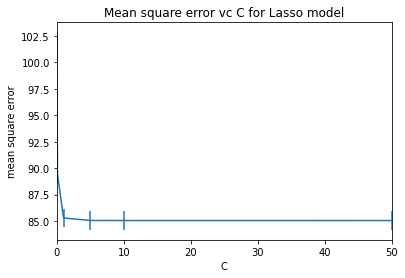

In [43]:
plt.errorbar(C_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('mean square error')
plt.title('Mean square error vc C for Lasso model')
plt.xlim(0,50)
plt.show()

In [44]:
from sklearn.model_selection import KFold
mean_error1=[]
std_error1=[]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for c in C_range:
    model = Ridge(alpha = 1/(2*c))
    temp=[]
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        y_predict = model.predict(X.iloc[test])
        temp.append(mean_squared_error(y.iloc[test],y_predict))
    mean_error1.append(np.array(temp).mean())
    std_error1.append(np.array(temp).std())

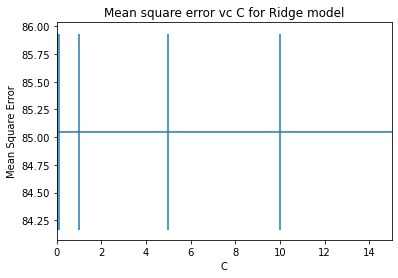

In [45]:
plt.errorbar(C_range, mean_error1, yerr=std_error1)
plt.xlabel('C')
plt.ylabel('Mean Square Error')
plt.title('Mean square error vc C for Ridge model')
plt.xlim(0,15)
plt.show()

In [46]:
X_train.head()

,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature
69874,1016.467,207.0,18.073,22.912,1.875,4.688,14.790,14.185
60245,1029.614,328.0,12.096,15.085,0.781,3.281,13.594,15.278
63220,1000.234,53.0,22.770,28.234,2.656,5.859,9.458,9.375
28985,1022.290,82.0,10.246,14.373,0.703,3.867,8.296,9.058
69326,1023.132,292.0,10.531,13.662,1.406,5.273,8.979,11.826


# Elastic regression

In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: -6.817
Config: {'alpha': 0.0, 'l1_ratio': 0.0}


c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 969521.4083888003, tolerance: 280.9404325520486
  model = cd_fast.enet_coordinate_descent(


In [48]:
prediction_elastic = results.predict(X_test)
# print(prediction_elastic)

In [49]:
print('R2 score for lasso: ', r2_score(y_test, prediction_elastic))
print('RMSE for lasso: ',  np.sqrt(mean_squared_error(y_test, prediction_elastic)))
print('Mean_absolute_error: ', mean_absolute_error(y_test, prediction_elastic))

R2 score for lasso:  0.29903178112023243
RMSE for lasso:  8.377219866157082
Mean_absolute_error:  6.803441083141765
